###**Group members:**
1. Abdul Basit Raja
2. Pranav Kumar Sah
3. Pratik Nichite

#**Project on Text Summarization using transformer**

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import warnings
warnings.filterwarnings('ignore')

### installations

In [ ]:
!pip install datasets
!pip install py7zr
!pip install accelerate
!pip install sentencepiece
!pip install rouge-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 681.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup

### Trying different models from Hugging Face (BART, T5, PEGASUS)

In [ ]:
from transformers import pipeline

In [ ]:
input_text = '''BERT, which stands for Bidirectional Encoder Representations from Transformers, is a natural language processing (NLP) model developed by Google. It represents a significant advancement in the field of deep learning for language understanding. BERT is based on the Transformer architecture, which was introduced in a paper by Vaswani et al. in 2017.
The key innovation of BERT is its bidirectional training approach. Unlike previous language models that processed text in a left-to-right or right-to-left manner, BERT considers both the left and right context in all layers of the neural network. This bidirectional approach allows BERT to capture a more comprehensive understanding of the context and semantics of words in a sentence.
BERT has been pre-trained on large amounts of text data and can be fine-tuned for various NLP tasks, such as text classification, named entity recognition, and question answering. It has achieved state-of-the-art results on a wide range of benchmarks and has become a foundational model for many natural language processing applications.
'''

summaries = {}

In [ ]:
model = pipeline('summarization', model="facebook/bart-large-cnn")
summaries["bart"] = model(input_text)[0]['summary_text']

model = pipeline('summarization', model="t5-base")
summaries["t5"] = model(input_text)[0]['summary_text']

model = pipeline('summarization', model="google/pegasus-cnn_dailymail")
summaries["pegasus"] = model(input_text)[0]['summary_text']

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# https://huggingface.co/tuner007/pegasus_paraphrase

import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

model_name = 'tuner007/pegasus_paraphrase'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)

def get_response(input_text,num_return_sequences):
  batch = tokenizer.prepare_seq2seq_batch([input_text],truncation=True,padding='longest',max_length=60, return_tensors="pt").to(torch_device)
  translated = model.generate(**batch,max_length=60,num_beams=10, num_return_sequences=num_return_sequences, temperature=1.5)
  tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
  return tgt_text

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at tuner007/pegasus_paraphrase and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
summaries["tuner_pegasus"] = get_response(input_text, 1)[0]
summaries["tuner_pegasus"]

'BERT is based on the Transformer architecture and is a significant advancement in the field of deep learning for language understanding.'

In [ ]:
print(f"Input Length: {len(input_text)}\nInput Text:\n{input_text}\n")
print(f"BART Output Length: {len(summaries['bart'])}\nBART Output: {summaries['bart']}\n")
print(f"T5 Output Length: {len(summaries['t5'])}\nT5 Output: {summaries['t5']}\n")
print(f"PEGASUS Output Length: {len(summaries['pegasus'])}\nPEGASUS Output: {summaries['pegasus']}\n")
print(f"TUNER PEGASUS Output Length: {len(summaries['tuner_pegasus'])}\nTUNER PEGASUS Output: {summaries['tuner_pegasus']}\n")

Input Length: 1074
Input Text:
BERT, which stands for Bidirectional Encoder Representations from Transformers, is a natural language processing (NLP) model developed by Google. It represents a significant advancement in the field of deep learning for language understanding. BERT is based on the Transformer architecture, which was introduced in a paper by Vaswani et al. in 2017.
The key innovation of BERT is its bidirectional training approach. Unlike previous language models that processed text in a left-to-right or right-to-left manner, BERT considers both the left and right context in all layers of the neural network. This bidirectional approach allows BERT to capture a more comprehensive understanding of the context and semantics of words in a sentence.
BERT has been pre-trained on large amounts of text data and can be fine-tuned for various NLP tasks, such as text classification, named entity recognition, and question answering. It has achieved state-of-the-art results on a wide ra

### Comparing models

In [ ]:
import matplotlib.pyplot as plt

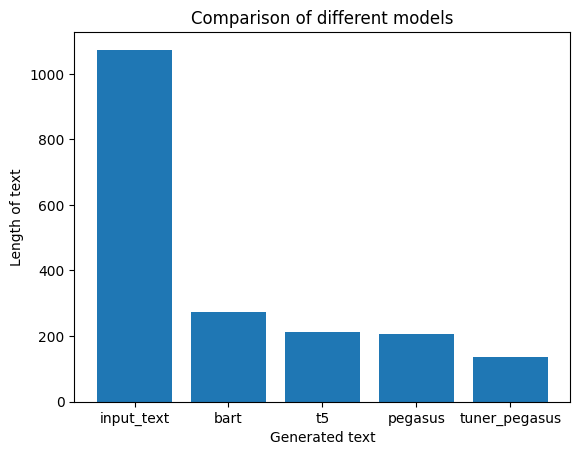

In [ ]:
x_data = ["input_text"]
x_data.extend(list(summaries.keys()))

y_data = [len(input_text)]
y_data.extend(list(map(lambda x: len(x), summaries.values())))

plt.bar(x_data, y_data)
plt.ylabel("Length of text")
plt.xlabel("Generated text")
plt.title("Comparison of different models");

### Training Facebook BART model on SAMSum dataset from Hugging Face

In [ ]:
from datasets import load_dataset
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

In [ ]:
device = 'gpu'
model_ckpt = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

In [ ]:
samsum = load_dataset('samsum')
samsum

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [ ]:
# lets build Data Collator

def get_feature(batch):
  encodings = tokenizer(batch['dialogue'], text_target=batch['summary'],
                        max_length=1024, truncation=True)

  encodings = {'input_ids': encodings['input_ids'],
               'attention_mask': encodings['attention_mask'],
               'labels': encodings['labels']}

  return encodings

In [ ]:
samsum_pt = samsum.map(get_feature, batched=True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
columns = ['input_ids', 'labels', 'attention_mask']
samsum_pt.set_format(type='torch', columns=columns)

In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir = 'bart_dialogue',
    num_train_epochs=1,
    warmup_steps = 500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay = 0.01,
    logging_steps = 10,
    evaluation_strategy = 'steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16
)

trainer = Trainer(model=model, args=training_args, tokenizer=tokenizer, data_collator=data_collator,
                  train_dataset = samsum_pt['train'], eval_dataset = samsum_pt['validation'])

In [ ]:
trainer.train()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss


TrainOutput(global_step=230, training_loss=1.4831058502197265, metrics={'train_runtime': 1792.0504, 'train_samples_per_second': 8.221, 'train_steps_per_second': 0.128, 'total_flos': 8823772719611904.0, 'train_loss': 1.4831058502197265, 'epoch': 1.0})

### Exporting fine-tuned model

In [ ]:
trainer.save_model('/content/drive/MyDrive/Semantics Project/bart_samsum_model')

### Importing fine-tuned model

In [ ]:
model = pipeline('summarization', model="/content/drive/MyDrive/Semantics Project/bart_samsum_model")

### Comparing trained model with other pre-trained models (BART, T5, PEGASUS)

In [ ]:
from rouge_score import rouge_scorer
import numpy as np
import pandas as pd

In [ ]:
summaries["trained_model"] = model(input_text)[0]['summary_text']
summaries["trained_model"]

'BERT is a natural language processing (NLP) model developed by Google. It is based on the Transformer architecture. It has been pre-trained on large amounts of text data and can be fine-tuned for various NLP tasks, such as text classification, named entity recognition, and question answering.'

In [ ]:
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)


model_scores = {}
for model_name, summary in summaries.items():
  model_scores[model_name] = scorer.score(input_text, summary)

rouge_scores = [score['rougeL'].fmeasure for score in model_scores.values()]

rouge_scores

[0.40930232558139534, 0.28, 0.26, 0.15625, 0.4292237442922375]

In [ ]:
model_scores

{'bart': {'rougeL': Score(precision=1.0, recall=0.2573099415204678, fmeasure=0.40930232558139534)},
 't5': {'rougeL': Score(precision=0.9655172413793104, recall=0.16374269005847952, fmeasure=0.28)},
 'pegasus': {'rougeL': Score(precision=0.896551724137931, recall=0.15204678362573099, fmeasure=0.26)},
 'tuner_pegasus': {'rougeL': Score(precision=0.7142857142857143, recall=0.08771929824561403, fmeasure=0.15625)},
 'trained_model': {'rougeL': Score(precision=0.9791666666666666, recall=0.27485380116959063, fmeasure=0.4292237442922375)}}

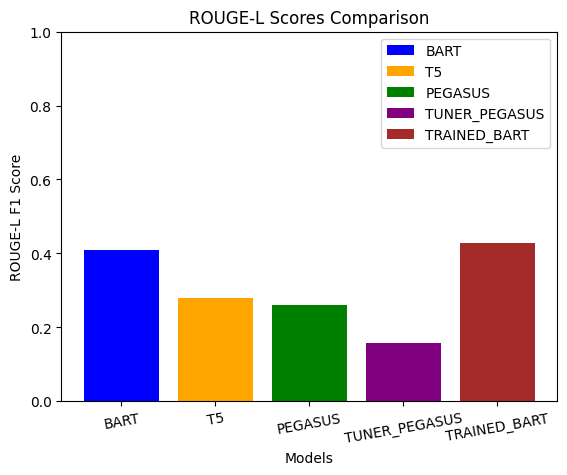

,Model,Rouge-F1 Score
0,BART,0.409302
1,T5,0.280000
2,PEGASUS,0.260000
3,TUNER_PEGASUS,0.156250
4,TRAINED_BART,0.429224


In [ ]:
models = ['BART', 'T5', 'PEGASUS', 'TUNER_PEGASUS', 'TRAINED_BART']
bars = plt.bar(models, rouge_scores, color=['blue', 'orange', 'green', 'purple', 'brown'])

# Add a legend
plt.legend(bars, models)
plt.xlabel('Models')
plt.ylabel('ROUGE-L F1 Score')
plt.title('ROUGE-L Scores Comparison')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.xticks(rotation=10)
plt.show()

df = pd.DataFrame({"Model":models, "Rouge-F1 Score":rouge_scores})
df

- We can see that fine-tuned model has better score than other models

- We upload this same fine-tuned model to Hugging Face and use it through API interface in our frontend code.

#The End